# PRCP-1001-RICE LEAF DISEASE DETECTION USING CNN

#### Problem Statement
 - Prepare a complete data analysis report on the given data
 - Build a Deep Learning model to classifies Rice Leaf Disease into
   - Leaf Smut
   - Brown Spot
   - Bacterial Leaf Blight
 - Create a report stating the performance of multiple models on this data and suggest the best model for production.
 - Analyze various techniques like Data Augmentation, etc and create a report on that

img = cv2.imread("E:\\Capstone Projects\\PRCP-1001-Rice Leaf CNN\\PRCP-1001-RiceLeaf\\Data\\Bacterial leaf blight\\DSC_0365.JPG")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('Image Shape:', img.shape)

plt.imshow(img)
plt.axis('off')
plt.title('Leaf Blight Sample')
plt.show()

## Loading the data

In [1]:
data = "E:\\Capstone Projects\\PRCP-1001-Rice Leaf CNN\\PRCP-1001-RiceLeaf\\Data"

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os

In [5]:
for folder in os.listdir(data):
    folder_path = os.path.join(data, folder)
    num_images = len(os.listdir(folder_path))
    print(f"{folder}: {num_images} image")

Bacterial leaf blight: 40 image
Brown spot: 40 image
Leaf smut: 39 image


## TASK  - 1 Displaying Sample name from Each Class

In [6]:
def show_images_each_class(class_name):
    folder = os.path.join(data, class_name)
    images = os.listdir(folder)[:5]
    plt.figure(figsize=(20,10))
    for i, each_img in enumerate(images):  # i is index
        img_path = os.path.join(folder, each_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

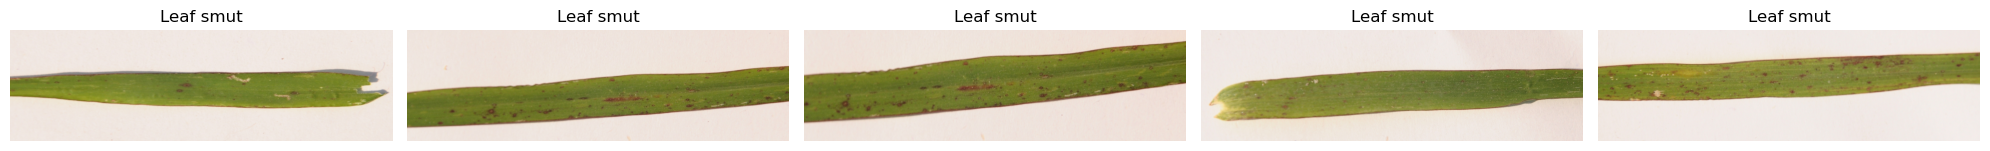

In [7]:
show_images_each_class('Leaf smut')

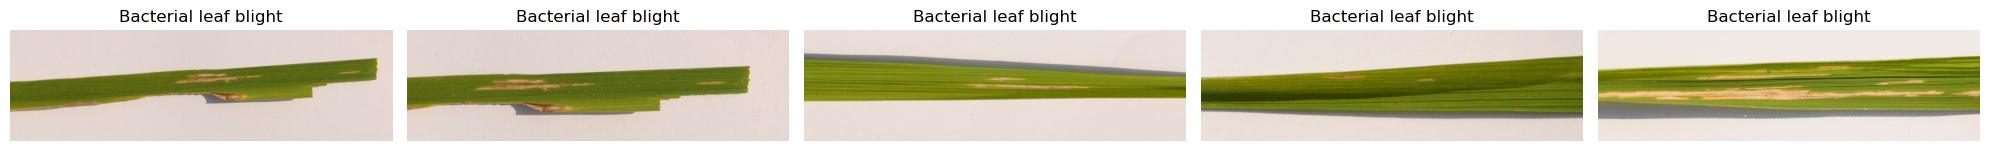

In [8]:
show_images_each_class('Bacterial leaf blight')

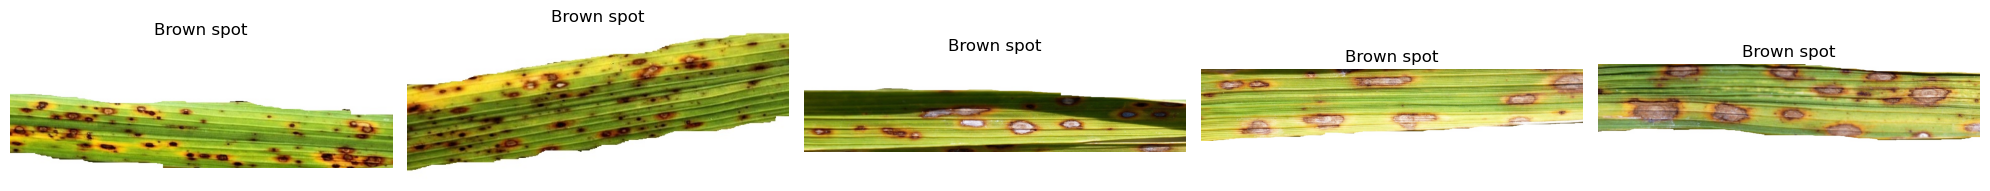

In [9]:
show_images_each_class('Brown spot')

## Image Preprocessing

In [10]:
import numpy as np

In [11]:
class_names = os.listdir(data)
label_map = {name:i for i,name in enumerate(class_names)}

In [12]:
label_map

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [13]:
img_size = 224
X = []
y = []

In [14]:
for class_name in class_names:  # class_name = each folder
    folder = os.path.join(data, class_name)  # folder = each folder path
    for images in os.listdir(folder):
        img_path = os.path.join(folder, images)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img,(img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = img /255.0
            X.append(img)
            y.append(label_map[class_name])

In [15]:
print(X)
print(y)

[array([[[229, 215, 210],
        [227, 214, 208],
        [227, 212, 209],
        ...,
        [230, 215, 210],
        [230, 217, 211],
        [229, 216, 211]],

       [[226, 214, 208],
        [227, 214, 208],
        [229, 214, 210],
        ...,
        [230, 215, 210],
        [228, 215, 209],
        [231, 215, 210]],

       [[228, 214, 209],
        [228, 214, 209],
        [230, 213, 208],
        ...,
        [228, 215, 209],
        [229, 216, 210],
        [233, 215, 211]],

       ...,

       [[229, 216, 210],
        [228, 215, 207],
        [228, 215, 209],
        ...,
        [225, 214, 210],
        [229, 216, 210],
        [228, 215, 210]],

       [[228, 215, 209],
        [227, 212, 207],
        [229, 216, 209],
        ...,
        [225, 214, 210],
        [229, 215, 209],
        [228, 215, 209]],

       [[227, 213, 208],
        [229, 214, 211],
        [229, 216, 209],
        ...,
        [227, 214, 211],
        [228, 215, 209],
        [228, 215, 207]

#### Converting to Numpy Array

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
print(X)
print(y)

[[[[229 215 210]
   [227 214 208]
   [227 212 209]
   ...
   [230 215 210]
   [230 217 211]
   [229 216 211]]

  [[226 214 208]
   [227 214 208]
   [229 214 210]
   ...
   [230 215 210]
   [228 215 209]
   [231 215 210]]

  [[228 214 209]
   [228 214 209]
   [230 213 208]
   ...
   [228 215 209]
   [229 216 210]
   [233 215 211]]

  ...

  [[229 216 210]
   [228 215 207]
   [228 215 209]
   ...
   [225 214 210]
   [229 216 210]
   [228 215 210]]

  [[228 215 209]
   [227 212 207]
   [229 216 209]
   ...
   [225 214 210]
   [229 215 209]
   [228 215 209]]

  [[227 213 208]
   [229 214 211]
   [229 216 209]
   ...
   [227 214 211]
   [228 215 209]
   [228 215 207]]]


 [[[229 216 210]
   [228 213 208]
   [232 214 210]
   ...
   [228 215 210]
   [228 213 208]
   [230 213 209]]

  [[227 214 207]
   [227 213 207]
   [230 214 210]
   ...
   [226 215 211]
   [228 213 208]
   [228 214 208]]

  [[228 215 209]
   [228 213 208]
   [230 215 211]
   ...
   [228 214 211]
   [229 214 209]
   [229 215

#### Handling Imbalance

Leaf Smut has one missing value. Duplicate with Random Data of Same Class. Doing it after converting data into array because it may cause mismatch X and y

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=42)

## Data Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rotation_range = 30,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   brightness_range = [0.8, 1.2],
                                   shear_range = 0.2,
                                   rescale=1./255,
                                   fill_mode = 'nearest')

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_gen = train_datagen.flow(X_train,y_train,batch_size = 16,shuffle=True)
test_gen = test_datagen.flow(X_test,y_test,batch_size = 16,shuffle = False)

## Training with Model

### Creating Custom model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [55]:
model = Sequential()

In [56]:
from tensorflow.keras.layers import Input

In [57]:
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [58]:
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [59]:
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [60]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [61]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Applying Custom Model

In [62]:
history = model.fit(train_gen, validation_data = test_gen, epochs = 20, verbose = 1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2802 - loss: 2.1538 - val_accuracy: 0.3333 - val_loss: 1.1270
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3159 - loss: 1.0955 - val_accuracy: 0.3750 - val_loss: 1.0860
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3832 - loss: 1.0990 - val_accuracy: 0.5833 - val_loss: 1.0539
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4221 - loss: 1.0678 - val_accuracy: 0.5833 - val_loss: 0.9586
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4674 - loss: 1.0034 - val_accuracy: 0.5417 - val_loss: 0.8391
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4661 - loss: 0.9694 - val_accuracy: 0.5833 - val_loss: 0.8063
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6159 - loss: 0.8734 - val_accuracy: 0.7500 - val_loss: 0.7479
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5833 - loss: 0.8760 - val_accuracy: 0.5833 - val_loss: 0.6778
Epoch 9/

### Evaluate

In [63]:
loss,accuracy = model.evaluate(test_gen)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8264 - loss: 0.6035
Loss: 0.5834539532661438
Accuracy: 0.8333333134651184


### Pre Trained Model-MobileNetV2

In [34]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [35]:
base_model = MobileNetV2(weights = 'imagenet',include_top = False, input_shape=(224,224,3))
base_model.trainable = True  # unfreeze entire base
for layer in base_model.layers[:-20]:  # freeze all except last 20
    layer.trainable = False

In [36]:
inputs = Input(shape = (224,224,3))
X = preprocess_input(inputs)
X = base_model(X, training = False)
X = GlobalAveragePooling2D()(X)
X = Dense(128, activation = 'relu')(X)
X = Dropout(0.3)(X)
outputs = Dense(3,activation = 'softmax')(X)

mod = Model(inputs, outputs)

In [37]:
mod.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
mod.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 1,370,435 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [38]:
history = mod.fit(train_gen,validation_data = test_gen,epochs = 20)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3340 - loss: 1.1922 - val_accuracy: 0.3333 - val_loss: 1.2007
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3527 - loss: 1.1678 - val_accuracy: 0.4167 - val_loss: 1.1593
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3194 - loss: 1.1269 - val_accuracy: 0.4583 - val_loss: 1.1406
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 998ms/step - accuracy: 0.3149 - loss: 1.1404 - val_accuracy: 0.3333 - val_loss: 1.1233
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4442 - loss: 1.0601 - val_accuracy: 0.3333 - val_loss: 1.1111
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3528 - loss: 1.1110 - val_accuracy: 0.3333 - val_loss: 1.1126
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4034 - loss: 1.1179 - val_accuracy: 0.2917 - val_loss: 1.1058
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5045 - loss: 1.0679 - val_accuracy: 0.3333 - val_loss: 1.1038
Epoch 9

In [39]:
loss,accuracy = mod.evaluate(test_gen)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3472 - loss: 1.1140
Loss: 1.1265779733657837
Accuracy: 0.3333333432674408


### Pre Trained Model- ResNet50

In [40]:
from tensorflow.keras.applications import ResNet50

In [41]:
base = ResNet50(weights = 'imagenet',include_top = False, input_shape = (224,224,3))
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [42]:
inputs = Input(shape=(224,224,3))
X = preprocess_input(inputs)
X = base(X, training = False)
X = GlobalAveragePooling2D()(X)
X = Dense(128, activation = 'relu')(X)
X = Dropout(0.3)(X)
outputs = Dense(3,activation = 'softmax')(X)

modal = Model(inputs,outputs)

In [43]:
modal.compile(optimizer = Adam(learning_rate = 1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Call Backs

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [45]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2, verbose = 1)]

In [46]:
history = modal.fit(train_gen,validation_data = test_gen,epochs = 10, ) #callbacks = callbacks)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 278s 13s/step - accuracy: 0.3590 - loss: 1.3367 - val_accuracy: 0.3333 - val_loss: 1.1154
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 13s/step - accuracy: 0.3937 - loss: 1.1119 - val_accuracy: 0.3333 - val_loss: 1.1221
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 12s/step - accuracy: 0.4317 - loss: 1.0528 - val_accuracy: 0.3333 - val_loss: 1.1153
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 13s/step - accuracy: 0.4914 - loss: 1.0740 - val_accuracy: 0.3333 - val_loss: 1.1515
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 74s 12s/step - accuracy: 0.5301 - loss: 1.0568 - val_accuracy: 0.3333 - val_loss: 1.2286
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 73s 12s/step - accuracy: 0.6281 - loss: 0.8953 - val_accuracy: 0.3333 - val_loss: 1.3600
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 73s 12s/step - accuracy: 0.6141 - loss: 0.8362 - val_accuracy: 0.3333 - val_loss: 1.4227
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 13s/step - accuracy: 0.5953 - loss: 0.8822 - val_accuracy: 0.3333 - val_loss: 1.4637

In [47]:
loss,accuracy = modal.evaluate(test_gen)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3472 - loss: 1.4737
Loss: 1.4484034776687622
Accuracy: 0.3333333432674408


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict probabilities
y_pred_probs = modal.predict(test_gen)

# Get predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Use actual labels from test split
y_true = y_test  # ✅

# Evaluate
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step
[[0 0 8]
 [0 0 8]
 [0 0 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.33      1.00      0.50         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24



### Pre Trained Model - EfficientNetB0

In [49]:
from tensorflow.keras.applications import EfficientNetB0

In [50]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

inputs = Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_2 (TrueDivide)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_2 (Subtract)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 1,515,315 (5.78 MB)

 Non-trainable params: 2,698,611 (10.29 MB)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=20,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3403 - loss: 1.1186

6/6 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.3353 - loss: 1.1199 - val_accuracy: 0.3333 - val_loss: 1.1007
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2830 - loss: 1.1593 - val_accuracy: 0.3333 - val_loss: 1.1007
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3497 - loss: 1.1140 - val_accuracy: 0.3333 - val_loss: 1.1017
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3177 - loss: 1.1232 - val_accuracy: 0.3333 - val_loss: 1.1015
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2729 - loss: 1.1433 - val_accuracy: 0.3333 - val_loss: 1.1023
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3429 - loss: 1.1326 - val_accuracy: 0.3333 - val_loss: 1.1028
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3606 - loss: 1.0854 - val_accuracy: 0.3333 - val_loss: 1.1022


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

loss, acc = model.evaluate(test_gen)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {acc}")

y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.3472 - loss: 1.1005
Test Loss: 1.1007219552993774
Test Accuracy: 0.3333333432674408
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 15s/step
[[0 0 8]
 [0 0 8]
 [0 0 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.33      1.00      0.50         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24



## Task 2 - Report on Data Augmentation

#### Techniques Applied

 - Rotation: Random rotations up to 30 degrees

 - Zoom: 0.2 range zoom-in/out

 - Width & Height Shift: Small shifts to simulate real-world variation

 - Horizontal & Vertical Flip: To simulate mirrored leaf appearance

 - Rescale: Pixel normalization using rescale=1./255

 - Brightness: between 0.8 to 1.2 Range

#### Effectiveness

 - Helped reduce overfitting in the Custom CNN model

 - Did not significantly improve transfer learning models due to limited data

#### Conclusion
While Transfer Learning models did not outperform the Custom CNN due to the extremely limited dataset size (~120 images), data augmentation played a vital role in improving the generalizability of the custom architecture.

## Task 3 - Report on Models

#### Custom CNN Model

 - Structure: 3 convolutional layers with increasing filter depth, followed by max pooling, flattening, and dense layers.

 - Loss Function: Sparse Categorical Crossentropy

 - Accuracy: ~83% (best performance among all models tested)

 - Performed decently with limited data; susceptible to overfitting. Reduced complexity helped improve generalization.

#### MobileNetV2

 - Transfer Learning: Used pretrained weights from ImageNet; only last few layers unfrozen.

 - Used Because Lightweight, fast inference, efficient on small datasets.

- Accuracy: ~33%

 - Failed to generalize due to small dataset size and limited variation.

#### ResNet50

 - Transfer Learning: Pretrained on ImageNet, final layers customized.

 - Reason for Used: Deep architecture good for learning complex patterns.

 - Accuracy: ~33%

 - Suffered from underfitting; not suitable for extremely small datasets without further tuning.

#### EfficientNetB0

 - Transfer Learning: Pretrained backbone, Global Average Pooling, and Dense output.

 - Why Used: Balanced in terms of parameters and accuracy.

 - Accuracy: ~33%

 - Could not leverage full potential due to insufficient data.